In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Physical constants
rho = 1000  # Cloud droplet substance density [kg/m^3]
mu = 2.0/3.0  # Insolation-weighted cosine of the zenith angle
alpha_g = 0.2  # ground albedo
S_0 = 340  # Incoming TOA solar flux [W/m^2]

gamma = 1  # Hemi-isotropic approximation

Q_sca = 2.1762  # Mie scattering efficiency
g_hat = 0.9  # Mie scattering asymmetry factor

In [39]:
def alpha(alpha_g, alpha_a, alpha_a_prime):
    upstairs = (1-alpha_g)*(1-alpha_a)
    downstairs = (1-alpha_g)*alpha_a_prime + (1-alpha_a_prime)
    return 1 - (upstairs/downstairs)

In [40]:
def alpha_a(tau):
    beta_star = 1 - np.exp(-tau/mu)
    upstairs = (0.5 - gamma*mu)*beta_star + (1-g_hat)*gamma*tau
    downstairs = 1 + (1-g_hat)*gamma*tau
    return upstairs/downstairs

In [41]:
def alpha_a_prime(tau):
    upstairs = (1-g_hat)*gamma*tau
    downstairs = 1 + (1-g_hat)*gamma*tau
    return upstairs/downstairs

In [42]:
def tau_cloud(l_cloud, r):
    return 0.75 * Q_sca * l_cloud / (rho*r)

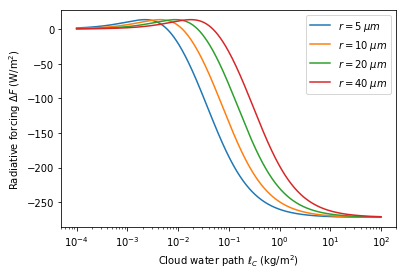

In [66]:
l_cloud_values = np.logspace(-4, 2, 1000)
r_values = [5e-6, 10e-6, 20e-6, 40e-6]

Delta_F_values = np.zeros(l_cloud_values.size)

for r in r_values:
    for i in np.arange(tau_cloud_values.size):
        tau_cloud_i = tau_cloud(l_cloud_values[i], r)

        alpha_a_prime_i = alpha_a_prime(tau_cloud_i)
        alpha_a_i = alpha_a(tau_cloud_i)
        alpha_i = alpha(alpha_g, alpha_a_i, alpha_a_prime_i)
        Delta_F_values[i] = (alpha_g-alpha_i)*S_0
    
    plt.semilogx(l_cloud_values, Delta_F_values, label=r'$r={:d} \; \mu m$'.format(int(r*1e6)))

plt.legend()
plt.xlabel('Cloud water path $\ell_C$ (kg/m$^2$)')
plt.ylabel('Radiative forcing $\Delta F$ (W/m$^2$)')
plt.show()

In [132]:
# Physical constants for problem 3(b)
sigma = 5.670367e-8  # Stefan-Boltzmann constant [W / (m^2 K^4)]
g = 9.80665  # Standard gravity [m/s^2]

R = 287.058  # Dry air gas constant [J/kg/K]
p_s = 101325  # Surface pressure [Pa]
tau_0 = 3  # Clear sky optical thickness [kg/m^2]
D = 1.5  # Two-stream diffusivity factor in the longwave

# Reference conditions
p_0 = 1e5  # [Pa]
T_0 = 296  # [K]

# 1976 US Standard Atmosphere constants
T_g = 288.15  # Ground temperature [K]

In [133]:
# 1976 US Standard Atmosphere temperature profile from surface to 20 km.
def T(z):
    Gamma = -6.5  # lapse rate from surface to 11 km [K/km]
    if z < 11000:
        return (288.15) + Gamma*(z/1000)
    elif 11000 <= z <= 20000:
        return (288.15) + Gamma*11
    else:
        raise ValueError('Standard atmosphere temperature profile not implemented above 20 km.')

In [134]:
def p(z):
    return p_0 * np.exp(-g*z/(R*T_0))

In [135]:
def tau_LW_gas(p):
    return tau_0 * (p/p_s)**4

In [136]:
def tau_LW(p, p_c, tau_cloud_LW):
    if p < p_c:
        return tau_0 * (p/p_s)**4
    elif p > p_c:
        return tau_0 * (p/p_s)**4 + tau_cloud_LW

In [168]:
def OLR(tau_cloud_LW, p_c):
    z_values = np.linspace(0, 20000, 1000)
    p_values = p(z_values)
    T_values = list(map(lambda z: T(z), z_values))
    
    tau_LW_values = np.zeros(p_values.size)
    for i in np.arange(p_values.size):
        tau_LW_values[i] = tau_LW(p_values[i], p_c, tau_cloud_LW)
    
    integrand_values = D * sigma * np.power(T_values, 4) * np.exp(-D * tau_LW_values)

    # Calculate upward fluxes due to emission from the surface and from the atmosphere
    surface_term = sigma * T_g**4 * np.exp(-D * tau_LW_values[-1])
    atmosphere_term = np.trapz(integrand_values, tau_LW_values)

    return surface_term + atmosphere_term

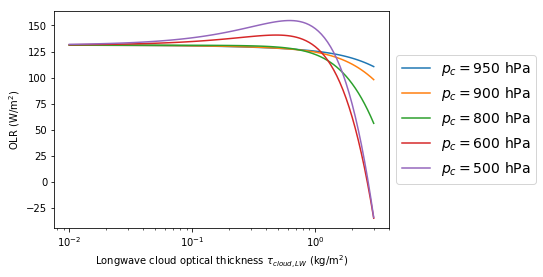

In [184]:
p_c_values = [95e3, 90e3, 80e3, 60e3, 50e3]
tau_cloud_LW_values = np.logspace(-2, np.log10(3), 100)
OLR_values = np.zeros(tau_cloud_LW_values.size)

for p_c in p_c_values:
    for i in np.arange(tau_cloud_LW_values.size):
        tau_cloud_LW = tau_cloud_LW_values[i]
        OLR_values[i] = OLR(tau_cloud_LW, p_c)
    
    plt.semilogx(tau_cloud_LW_values, OLR_values, label=r'$p_c = {:d}$ hPa'.format(int(p_c/1e2)))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel(r'Longwave cloud optical thickness $\tau_{cloud,LW}$ (kg/m$^2$)')
plt.ylabel('OLR (W/m$^2$)')
plt.show()

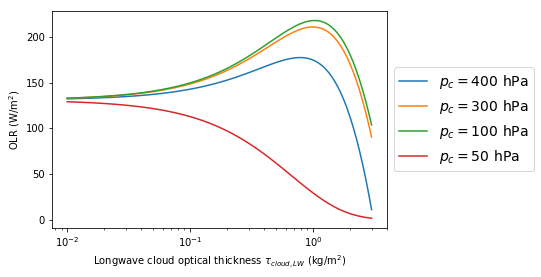

In [196]:
p_c_values = [40e3, 30e3, 10e3, 5e3]
tau_cloud_LW_values = np.logspace(-2, np.log10(3), 100)
OLR_values = np.zeros(tau_cloud_LW_values.size)

for p_c in p_c_values:
    for i in np.arange(tau_cloud_LW_values.size):
        tau_cloud_LW = tau_cloud_LW_values[i]
        OLR_values[i] = OLR(tau_cloud_LW, p_c)
    
    plt.semilogx(tau_cloud_LW_values, OLR_values, label=r'$p_c = {:d}$ hPa'.format(int(p_c/1e2)))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel(r'Longwave cloud optical thickness $\tau_{cloud,LW}$ (kg/m$^2$)')
plt.ylabel('OLR (W/m$^2$)')
plt.show()

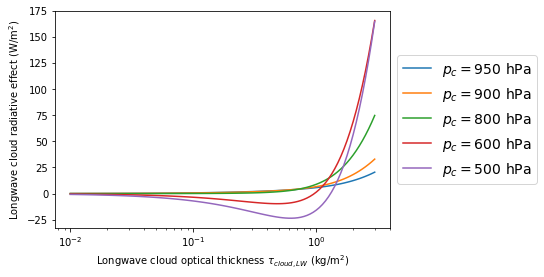

In [201]:
p_c_values = [95e3, 90e3, 80e3, 60e3, 50e3]
tau_cloud_LW_values = np.logspace(-2, np.log10(3), 100)
C_RF_values = np.zeros(tau_cloud_LW_values.size)

for p_c in p_c_values:
    for i in np.arange(tau_cloud_LW_values.size):
        tau_cloud_LW = tau_cloud_LW_values[i]
        C_RF_values[i] = OLR(0, p_c) - OLR(tau_cloud_LW, p_c)
    
    plt.semilogx(tau_cloud_LW_values, C_RF_values, label=r'$p_c = {:d}$ hPa'.format(int(p_c/1e2)))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel(r'Longwave cloud optical thickness $\tau_{cloud,LW}$ (kg/m$^2$)')
plt.ylabel('Longwave cloud radiative effect (W/m$^2$)')
plt.show()

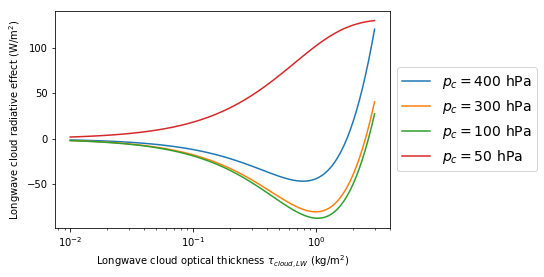

In [202]:
p_c_values = [40e3, 30e3, 10e3, 5e3]
tau_cloud_LW_values = np.logspace(-2, np.log10(3), 100)
C_RF_values = np.zeros(tau_cloud_LW_values.size)

for p_c in p_c_values:
    for i in np.arange(tau_cloud_LW_values.size):
        tau_cloud_LW = tau_cloud_LW_values[i]
        C_RF_values[i] = OLR(0, p_c) - OLR(tau_cloud_LW, p_c)
    
    plt.semilogx(tau_cloud_LW_values, C_RF_values, label=r'$p_c = {:d}$ hPa'.format(int(p_c/1e2)))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlabel(r'Longwave cloud optical thickness $\tau_{cloud,LW}$ (kg/m$^2$)')
plt.ylabel('Longwave cloud radiative effect (W/m$^2$)')
plt.show()